In [2]:
install.packages("arules")

package 'arules' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\JMLee\AppData\Local\Temp\Rtmp2VFkAc\downloaded_packages


In [4]:
library(arules)
data("Adult")
str(Adult)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:612200] 1 10 25 32 35 50 59 61 63 65 ...
  .. .. ..@ p       : int [1:48843] 0 13 26 39 52 65 78 91 104 117 ...
  .. .. ..@ Dim     : int [1:2] 115 48842
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	115 obs. of  3 variables:
  .. ..$ labels   : chr [1:115] "age=Young" "age=Middle-aged" "age=Senior" "age=Old" ...
  .. ..$ variables: Factor w/ 13 levels "age","capital-gain",..: 1 1 1 1 13 13 13 13 13 13 ...
  .. ..$ levels   : Factor w/ 112 levels "10th","11th",..: 111 63 92 69 30 54 65 82 90 91 ...
  ..@ itemsetInfo:'data.frame':	48842 obs. of  1 variable:
  .. ..$ transactionID: chr [1:48842] "1" "2" "3" "4" ...


In [5]:
rules <- apriori(Adult)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 4884 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[115 item(s), 48842 transaction(s)] done [0.03s].
sorting and recoding items ... [31 item(s)] done [0.01s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3 4 5 6 7 8 9 done [0.07s].
writing ... [6137 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [6]:
inspect(head(rules))

    lhs                         rhs                            support  
[1] {}                       => {race=White}                   0.8550428
[2] {}                       => {native-country=United-States} 0.8974243
[3] {}                       => {capital-gain=None}            0.9173867
[4] {}                       => {capital-loss=None}            0.9532779
[5] {relationship=Unmarried} => {capital-loss=None}            0.1019819
[6] {occupation=Sales}       => {race=White}                   0.1005282
    confidence lift     count
[1] 0.8550428  1.000000 41762
[2] 0.8974243  1.000000 43832
[3] 0.9173867  1.000000 44807
[4] 0.9532779  1.000000 46560
[5] 0.9719024  1.019537  4981
[6] 0.8920785  1.043314  4910


In [11]:
adult.rules <- apriori(Adult, parameter = list(support = 0.1, confidence = 0.6), 
appearance = list(rhs = c('income=small', 'income=large'), default = 'lhs'), control = list(verbose=FALSE))

In [12]:
adult.rules.sorted <- sort(adult.rules, by = 'lift')
inspect(head(adult.rules.sorted))

    lhs                               rhs              support confidence     lift count
[1] {age=Young,                                                                         
     workclass=Private,                                                                 
     capital-loss=None}            => {income=small} 0.1005282  0.6633342 1.310622  4910
[2] {age=Young,                                                                         
     workclass=Private}            => {income=small} 0.1025961  0.6630938 1.310147  5011
[3] {age=Young,                                                                         
     marital-status=Never-married,                                                      
     capital-gain=None,                                                                 
     capital-loss=None}            => {income=small} 0.1060563  0.6616426 1.307279  5180
[4] {age=Young,                                                                         
     marital-status=N

In [15]:
install.packages("arulesViz")

also installing the dependencies 'sys', 'gridExtra', 'askpass', 'viridis', 'curl', 'openssl', 'lmtest', 'TSP', 'qap', 'gclus', 'dendextend', 'registry', 'htmlwidgets', 'crosstalk', 'httr', 'hexbin', 'scatterplot3d', 'vcd', 'seriation', 'igraph', 'DT', 'plotly', 'visNetwork'



package 'sys' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'askpass' successfully unpacked and MD5 sums checked
package 'viridis' successfully unpacked and MD5 sums checked
package 'curl' successfully unpacked and MD5 sums checked
package 'openssl' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked
package 'TSP' successfully unpacked and MD5 sums checked
package 'qap' successfully unpacked and MD5 sums checked
package 'gclus' successfully unpacked and MD5 sums checked
package 'dendextend' successfully unpacked and MD5 sums checked
package 'registry' successfully unpacked and MD5 sums checked
package 'htmlwidgets' successfully unpacked and MD5 sums checked
package 'crosstalk' successfully unpacked and MD5 sums checked
package 'httr' successfully unpacked and MD5 sums checked
package 'hexbin' successfully unpacked and MD5 sums checked
package 'scatterplot3d' successful

Warning message:
"package 'arulesViz' was built under R version 3.6.2"Loading required package: grid
Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus


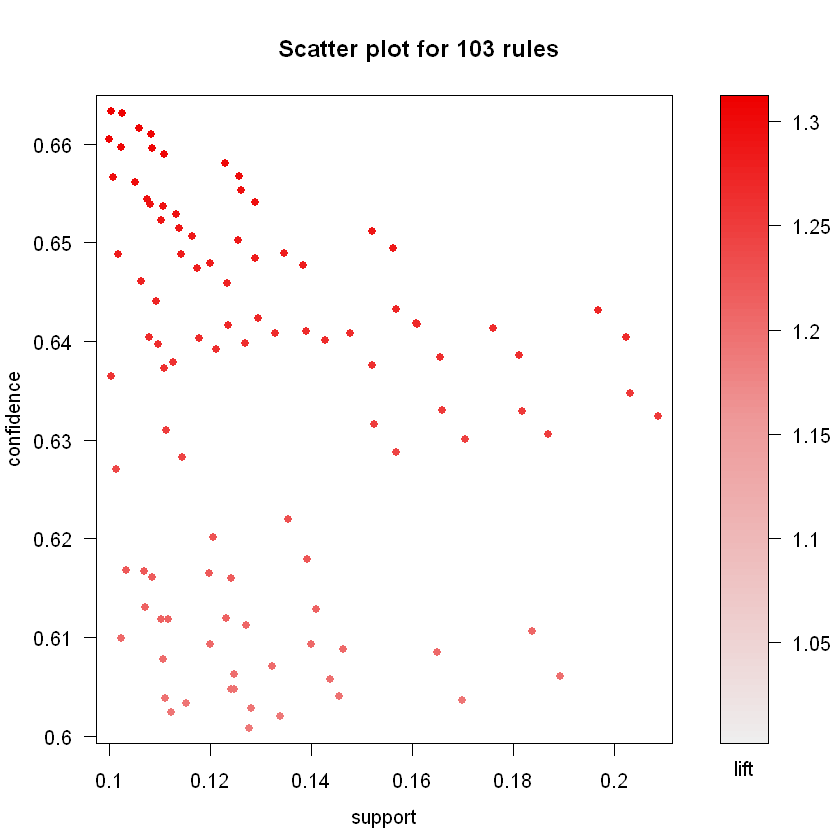

In [16]:
library(arulesViz)
plot(adult.rules.sorted, method = "scatterplot")

Warning message:
"Unknown control parameters: type"

Available control parameters (with default values):
main	 =  Graph for 100 rules
nodeColors	 =  c("#66CC6680", "#9999CC80")
nodeCol	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACACFF", "#EEAEAEFF", "#EEB0B0FF", "#EEB1B1FF", "#EEB3B3FF", "#E

Warning message:
"plot: Too many rules supplied. Only plotting the best 100 rules using 'support' (change control parameter max if needed)"

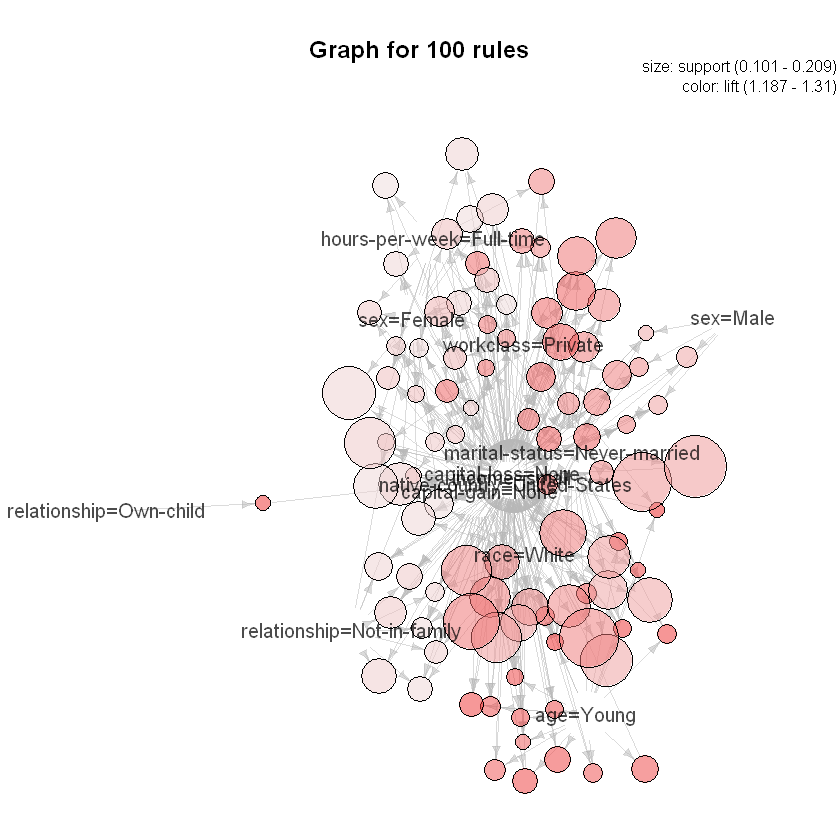

In [17]:
plot(adult.rules.sorted, method = 'graph', control = list(type = 'items', alpha = 0.5))